In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  PolynomialFeatures
import matplotlib.pyplot as plt

# 处理数据并计算出修正系数g(s)

In [19]:
df = pd.read_excel("./data.xlsx")
df.head()

,瞄准刻度,距离,夹角,命中刻度
0,12.7,14.87,67,13.8
1,9.2,11.37,88,11.0
2,5.2,6.81,59,9.5
3,8.3,9.99,67,11.5
4,8.2,9.41,86,14.7


In [20]:
# 网上说距离大于12公里时误差很小，经过检验确实如此
gb = df.groupby(df.距离>12)["距离"]
df = df.drop(gb.groups[True],axis=0)

根据夹角还原出真实值

In [21]:
def fitDistance(s,theta):
    theta = np.radians(90-theta)
    s = s/np.cos(theta)
    return s
fitDistance(1.7,60)

1.9629909152447274

In [22]:
df["瞄准刻度"] = fitDistance(df["瞄准刻度"],df["夹角"])

In [23]:
df["命中刻度"] = fitDistance(df["命中刻度"],df["夹角"])

In [24]:
df.head()

,瞄准刻度,距离,夹角,命中刻度
1,9.205608,11.37,88,11.006705
2,6.066494,6.81,59,11.083017
3,9.016791,9.99,67,12.493144
4,8.220024,9.41,86,14.735896
5,7.061342,7.60,67,14.665865


In [25]:
# 获取位移
df["位移倍数"] = df["命中刻度"] - df["瞄准刻度"]
# 似乎是记录落弹点时受特效影响，记录的位移偏大
df["位移倍数"] = df["位移倍数"].apply(lambda x:x*.75)
df["位移倍数"] = df["位移倍数"] / df["瞄准刻度"] + 1
df.head()

,瞄准刻度,距离,夹角,命中刻度,位移倍数
1,9.205608,11.37,88,11.006705,1.146739
2,6.066494,6.81,59,11.083017,1.620192
3,9.016791,9.99,67,12.493144,1.289157
4,8.220024,9.41,86,14.735896,1.594512
5,7.061342,7.60,67,14.665865,1.807692


In [26]:
df2 = df.drop(labels=["瞄准刻度","夹角","命中刻度"],axis = 1)
arr = np.array(df2)
arr

array([[11.37      ,  1.14673913],
       [ 6.81      ,  1.62019231],
       [ 9.99      ,  1.28915663],
       [ 9.41      ,  1.5945122 ],
       [ 7.6       ,  1.80769231],
       [10.71      ,  1.23901099],
       [ 9.57      ,  1.43670886],
       [ 8.37      ,  1.95769231],
       [ 8.47      ,  1.68478261],
       [10.95      ,  1.        ],
       [ 2.05      ,  8.453125  ],
       [ 5.11      ,  4.5       ],
       [ 4.99      ,  4.3125    ],
       [ 4.43      ,  4.79545455],
       [ 4.83      ,  5.171875  ],
       [ 6.14      ,  3.82954545],
       [ 6.98      ,  2.92857143],
       [ 6.38      ,  2.815     ],
       [ 6.37      ,  2.89      ],
       [ 7.97      ,  2.0125    ],
       [ 5.23      ,  3.78289474]])

# 进行拟合

In [27]:
x = np.vstack([arr,[13,1],[13,1],[13,1]])# 试图让拟合结果在12公里时为1

In [28]:
poly_reg =PolynomialFeatures(degree=2)
X_ploy =poly_reg.fit_transform(x[:,:1])
lin_reg=LinearRegression()
lin_reg.fit(X_ploy,x[:,1:])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
x = np.linspace(1, 12, 12)
x = x.reshape([x.shape[0],1])
x.shape

(12, 1)

In [30]:
X_ploy =poly_reg.fit_transform(x)
y_pred = lin_reg.predict(X_ploy)
y_pred

array([[10.02046639],
       [ 8.36818888],
       [ 6.88196255],
       [ 5.56178741],
       [ 4.40766344],
       [ 3.41959064],
       [ 2.59756903],
       [ 1.9415986 ],
       [ 1.45167934],
       [ 1.12781126],
       [ 0.96999436],
       [ 0.97822864]])

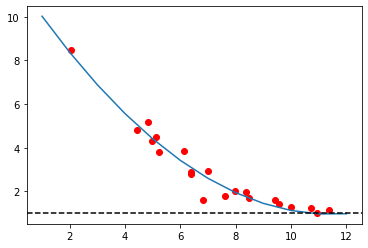

In [31]:
plt.plot(x,y_pred)
for num in arr:
    plt.scatter(num[0], num[1],color="red")
plt.axhline(y=1, c="black",ls="--")

In [34]:
print(f"线性拟合系数：{lin_reg.coef_}")
print(f"线性拟合截距{lin_reg.intercept_}")
i = 5
X_ploy =poly_reg.fit_transform([[i]])
y_pred = lin_reg.predict(X_ploy)
print(f"距离为{i}时输入参数{X_ploy},输出：{lin_reg.predict(X_ploy)}")

线性拟合系数：[[ 0.         -1.90135427  0.08302559]]
线性拟合截距[11.83879507]
距离为5时输入参数[[ 1.  5. 25.]],输出：[[4.40766344]]


In [36]:
def compute(s):
    return np.power(s,2)*0.08302559+s*(-1.90135427)+11.83879507
compute(5)

4.407663470000001